In [128]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
import plotly.graph_objects as go
import os
import numpy as np

# INPUT FILE NAME

In [129]:
sim_name = "17"

# Aggregate All Runs Into One File

In [130]:
# # directory = "/Users/richardeli/Downloads/USYD/Thesis/Data Generated/Window/Last_3000/"
# # output_path = "/Users/richardeli/Downloads/USYD/Thesis/Data Generated/Data Generated/Last_3000_Summary_with_STD.csv"
# # df = pd.read_csv(f"/Users/richardeli/Downloads/USYD/Thesis/Data Generated/Simulation/{sim_name}.csv")

# directory = "C:\\Users\\Ricky\\Documents\\GitHub\\Thesis\\Data Generated\\Last_3000\\"
# output_path = "C:\\Users\\Ricky\\Documents\\GitHub\\Thesis\\Data Generated\\Last_3000_Summary_with_STD.csv"
# df = pd.read_csv(f"C:\\Users\\Ricky\\Documents\\GitHub\\Thesis\\Data Generated\\Simulation\\{sim_name}.csv")

# column_names = [
#     'Trade Number', 'Market Price', 'Excess Demand', 'Speculator Proportion',
#     'Kurtosis MP', 'Kurtosis ED', 'Kurtosis SP', 'MP Volatility Last 100 Trades',
#     'MP Volatility Last 10 Trades', 'Pre-CUSP Market Price Difference', 
#     'Last 100 Pre-CUSP Market Prices Difference'
# ]

# # df = df[df['Catastrophe Point Found?'] == True]
# valid_runs = df['Run Number']

# averaged_data = []
# std_dev_data = []

# for row_index in range(3000):
#     row_values = []  

#     for run_number in valid_runs:
#         filename = f'Run {run_number}.csv'
#         file_path = os.path.join(directory, filename)

#         try:
#             run_df = pd.read_csv(file_path)

#             if row_index < len(run_df):
#                 row_values.append(run_df.iloc[row_index].values)
#             else:
#                 row_values.append([np.nan] * len(column_names))

#         except FileNotFoundError:
#             print(f"File not found: {file_path}")
#             row_values.append([np.nan] * len(column_names))

#     row_average = np.nanmean(row_values, axis=0)
#     row_std_dev = np.nanstd(row_values, axis=0) 

#     averaged_data.append(row_average)
#     std_dev_data.append(row_std_dev)

# averaged_df = pd.DataFrame(averaged_data, columns=column_names)
# std_dev_df = pd.DataFrame(std_dev_data, columns=[f"{col} STDV" for col in column_names])

# combined_df = pd.concat([averaged_df, std_dev_df], axis=1)

# # Save the combined DataFrame to CSV
# combined_df.to_csv(output_path, index=False)
# print(f"Averaged window data saved to {output_path}")

# Load New Aggregated Data

In [131]:
directory = "C:\\Users\\Ricky\\Documents\\GitHub\\Thesis\\Data Generated\\OLD_Last_3000_Summary_with_STD.csv"

# directory = "/Users/richardeli/Downloads/USYD/Thesis/Data Generated/Last_3000_Summary_with_STD.csv"

df = pd.read_csv(directory)
df
#Replace Trade Number so it starts from 1 not 10000
df['Trade Number'] = range(1, len(df) + 1)
df

,Trade Number,Market Price,Excess Demand,Speculator Proportion,Kurtosis MP,Kurtosis ED,Kurtosis SP,MP Volatility Last 100 Trades,MP Volatility Last 10 Trades,Pre-CUSP Market Price Difference,...,Market Price STDV,Excess Demand STDV,Speculator Proportion STDV,Kurtosis MP STDV,Kurtosis ED STDV,Kurtosis SP STDV,MP Volatility Last 100 Trades STDV,MP Volatility Last 10 Trades STDV,Pre-CUSP Market Price Difference STDV,Last 100 Pre-CUSP Market Prices Difference STDV
0,1,57.578991,-422.390805,64.927969,NaN,NaN,NaN,1.279826,1.020263,0.000000,...,21.244385,174.801958,0.139950,NaN,NaN,NaN,2.517267,2.475350,0.000000,6.053360
1,2,57.612452,-422.287356,64.927969,NaN,NaN,NaN,1.277923,1.021644,0.381098,...,21.262031,174.827594,0.139950,NaN,NaN,NaN,2.502997,2.297605,1.156568,6.074941
2,3,57.626692,-422.154534,64.928020,NaN,NaN,NaN,1.281834,1.047966,0.634994,...,21.260293,174.793205,0.139984,NaN,NaN,NaN,2.491471,2.352685,1.528946,6.096612
3,4,57.665453,-422.162197,64.928020,NaN,NaN,NaN,1.286403,1.098246,0.881098,...,21.280710,174.808249,0.139984,NaN,NaN,NaN,2.493963,2.627315,1.783569,6.112501
4,5,57.681290,-422.118774,64.928020,NaN,NaN,NaN,1.292222,1.153205,1.164623,...,21.237896,174.832501,0.139984,NaN,NaN,NaN,2.500612,2.786791,2.032782,6.122950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,67.819413,-412.283525,64.973640,NaN,NaN,NaN,1.201114,0.807611,53.033972,...,14.010726,170.680387,0.139972,NaN,NaN,NaN,2.189057,1.566664,10.566598,6.204093
2996,2997,68.156258,-412.048531,64.973640,NaN,NaN,NaN,1.197598,0.783947,53.056003,...,14.020010,170.693066,0.139972,NaN,NaN,NaN,2.179654,1.335911,10.565897,6.247333
2997,2998,68.484227,-411.747126,64.973640,NaN,NaN,NaN,1.195741,0.792795,53.089719,...,14.048430,170.674292,0.139972,NaN,NaN,NaN,2.173726,1.376394,10.549872,6.318330
2998,2999,68.922989,-411.448276,64.973640,NaN,NaN,NaN,1.213704,0.857185,53.131098,...,14.029810,170.666299,0.139972,NaN,NaN,NaN,2.218262,1.998893,10.542199,6.369113


# Correlation Matrix

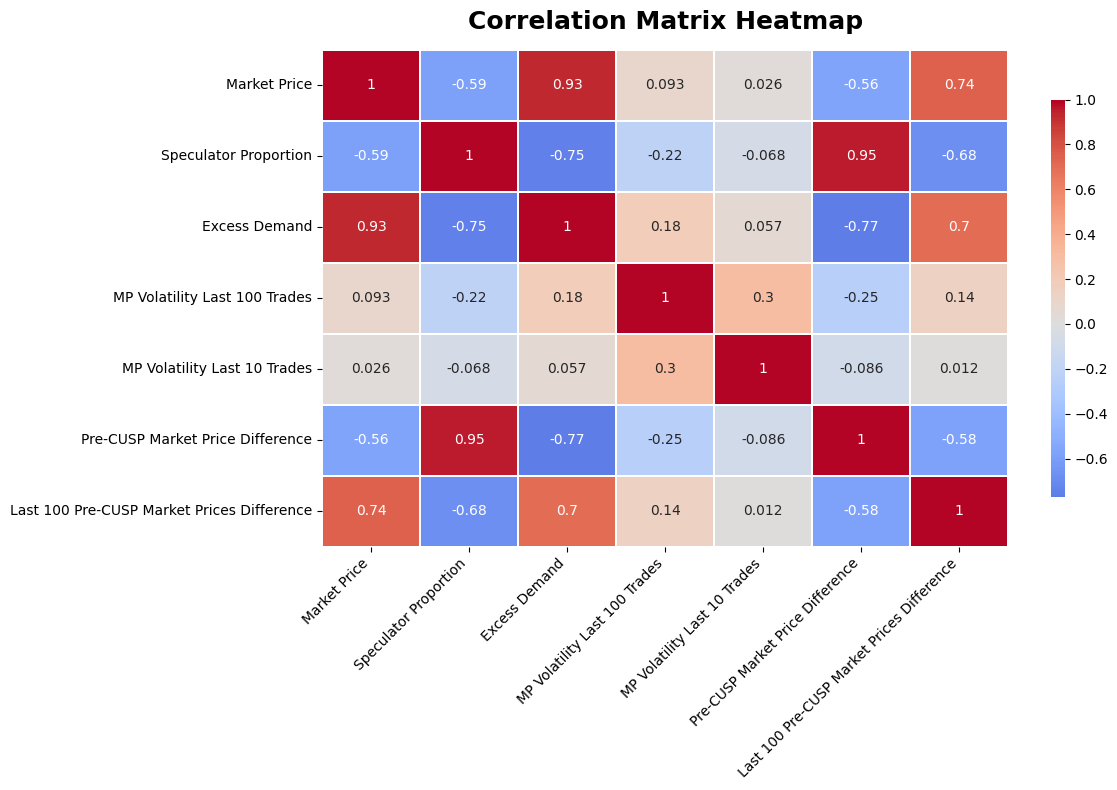

In [132]:
df_2 = df.copy()
corr_cols = [
    'Market Price', 'Speculator Proportion', 'Excess Demand', 'MP Volatility Last 100 Trades', 
    'MP Volatility Last 10 Trades', 'Pre-CUSP Market Price Difference', 'Last 100 Pre-CUSP Market Prices Difference'
]

# df_2 = df_2[columns_of_interest]
df_2 = df_2[corr_cols]
corr_matrix = df_2.corr()
corr_matrix
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='coolwarm', 
    center=0, 
    linewidths=0.3, 
    cbar_kws={"shrink": 0.8, "aspect": 30},  
    annot_kws={"size": 10}, 
)
plt.title('Correlation Matrix Heatmap', fontsize=18, weight='bold', pad=15)
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0) 
plt.tight_layout()
plt.show()

# Markets Price in Last 3000 Trades Pre-Crash

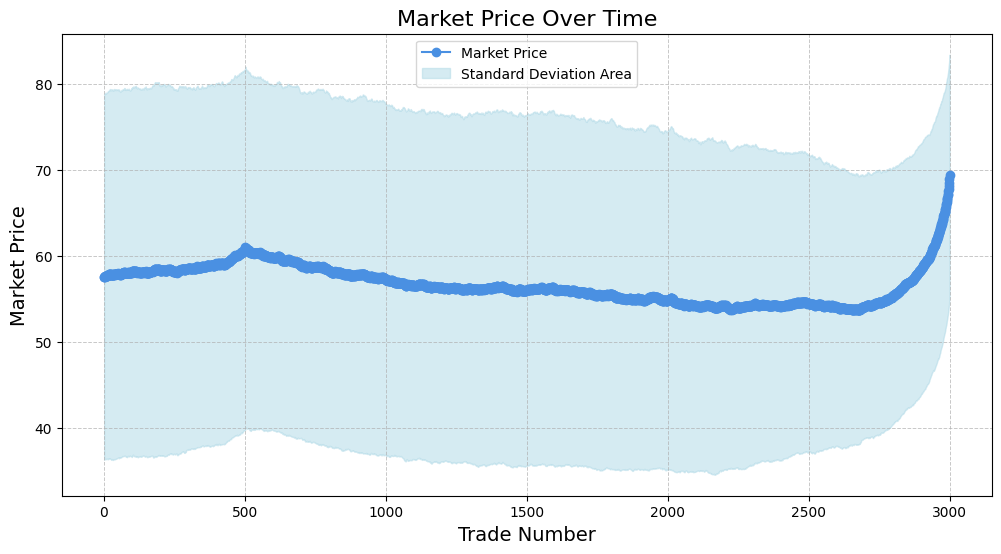

In [133]:
trade_number = df['Trade Number']
market_price = df['Market Price']
market_price_std = df['Market Price STDV']

upper_bound = market_price + market_price_std
lower_bound = market_price - market_price_std

plt.figure(figsize=(12, 6))

plt.plot(
    trade_number, market_price, 
    marker='o', linestyle='-', color='#4A90E2', label='Market Price'
)

plt.fill_between(trade_number, lower_bound, upper_bound, color='lightblue', alpha=0.5, label='Standard Deviation Area')

plt.xlabel('Trade Number', fontsize=14)
plt.ylabel('Market Price', fontsize=14)
plt.title('Market Price Over Time', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.legend()
plt.show()


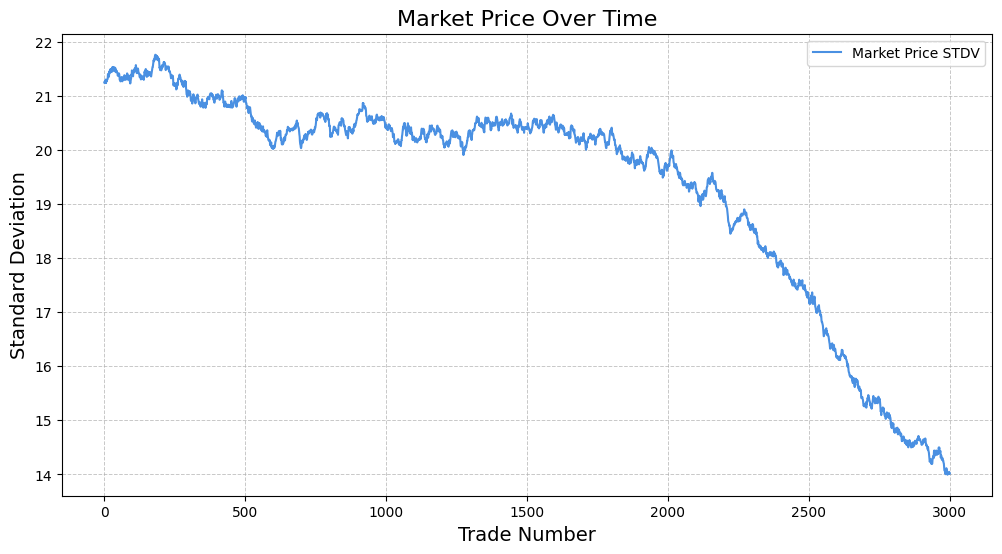

In [134]:
plt.figure(figsize=(12, 6))

plt.plot(
    trade_number, market_price_std, 
    linestyle='-', color='#4A90E2', label='Market Price STDV'
)

plt.xlabel('Trade Number', fontsize=14)
plt.ylabel('Standard Deviation', fontsize=14)
plt.title('Market Price Over Time', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.legend()
plt.show()

In [135]:
std_dev_1 = df.loc[1999, 'Market Price STDV']
std_dev_2 = df.loc[2999, 'Market Price STDV']

percentage_change = ((std_dev_2 - std_dev_1) / std_dev_2) * 100 if std_dev_1 != 0 else None
percentage_change

np.float64(-40.45889383326369)

# Excess Demand In Last 3000 trades pre catastrophe

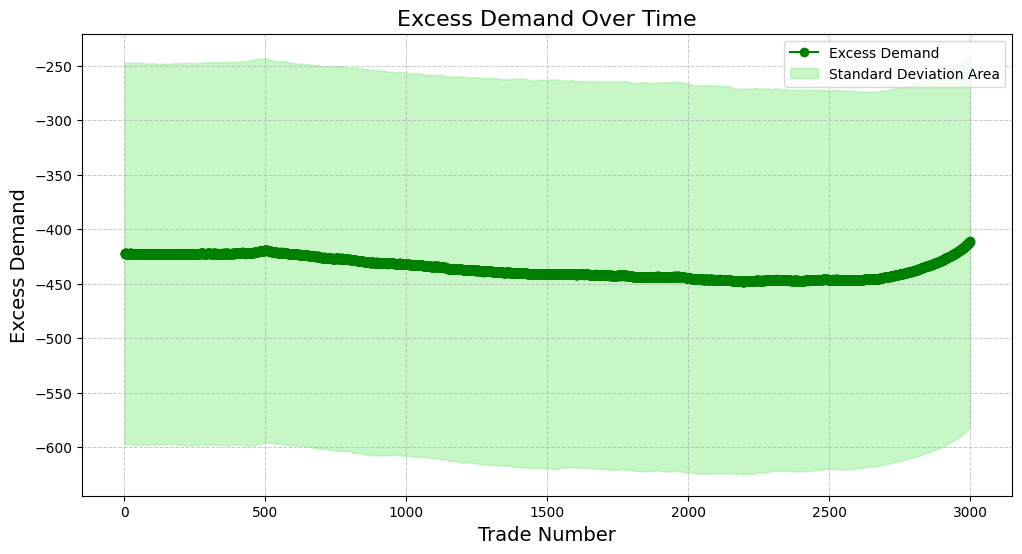

In [136]:
trade_number = df['Trade Number']
excess_demand = df['Excess Demand']
excess_demand_std = df['Excess Demand STDV']  # Assuming this column exists

upper_bound = excess_demand + excess_demand_std
lower_bound = excess_demand - excess_demand_std

plt.figure(figsize=(12, 6))

plt.plot(
    trade_number, excess_demand, 
    marker='o', linestyle='-', color='g', label='Excess Demand'  # Using green
)

plt.fill_between(trade_number, lower_bound, upper_bound, color='lightgreen', alpha=0.5, label='Standard Deviation Area')

plt.xlabel('Trade Number', fontsize=14)
plt.ylabel('Excess Demand', fontsize=14)
plt.title('Excess Demand Over Time', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.legend()
plt.show()


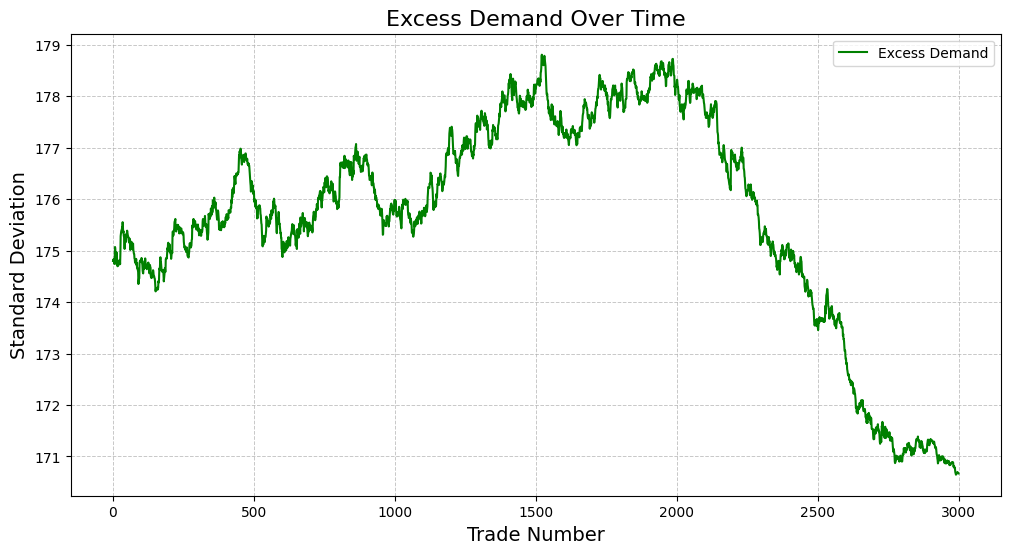

In [137]:
plt.figure(figsize=(12, 6))

plt.plot(
    trade_number, excess_demand_std, 
    linestyle='-', color='g', label='Excess Demand'  
)

plt.xlabel('Trade Number', fontsize=14)
plt.ylabel('Standard Deviation', fontsize=14)
plt.title('Excess Demand Over Time', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.legend()
plt.show()


In [138]:
std_dev_1 = df.loc[0, 'Excess Demand STDV']
std_dev_2 = df.loc[1999, 'Excess Demand STDV']

percentage_change = ((std_dev_2 - std_dev_1) / std_dev_2) * 100 if std_dev_1 != 0 else None
percentage_change

np.float64(1.9128317108191555)

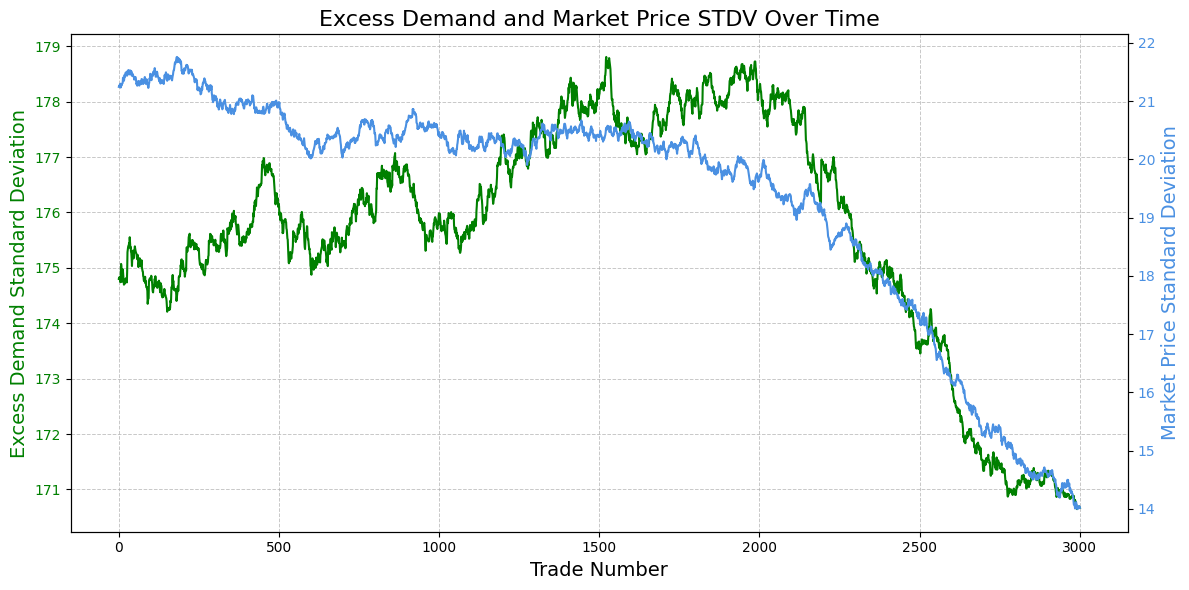

In [139]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Excess Demand on the first y-axis
ax1.plot(
    trade_number, excess_demand_std, 
    linestyle='-', color='g', label='Excess Demand'
)
ax1.set_xlabel('Trade Number', fontsize=14)
ax1.set_ylabel('Excess Demand Standard Deviation', fontsize=14, color='g')
ax1.tick_params(axis='y', labelcolor='g')
ax1.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Create the second y-axis for Market Price STDV
ax2 = ax1.twinx()  # Instantiate a second y-axis sharing the same x-axis
ax2.plot(
    trade_number, market_price_std, 
    linestyle='-', color='#4A90E2', label='Market Price STDV'
)
ax2.set_ylabel('Market Price Standard Deviation', fontsize=14, color='#4A90E2')
ax2.tick_params(axis='y', labelcolor='#4A90E2')

# Add a title and show the plot
plt.title('Excess Demand and Market Price STDV Over Time', fontsize=16)
fig.tight_layout()  # Adjust layout to prevent overlap
plt.show()


# Determining Volatilty Values; Last 10, Last 100

In [140]:
df_1 = df.copy()
df_1['Returns'] = df_1['Market Price'].pct_change()

# Calculate rolling volatility for every 10 and 100 trades
df_1['Volatility'] = df_1['Returns'].rolling(window=2).std() 
df_1['Volatility_10'] = df_1['Returns'].rolling(window=10).std()  # 10 trades
df_1['Volatility_100'] = df_1['Returns'].rolling(window=100).std()  # 100 trades

df_1

,Trade Number,Market Price,Excess Demand,Speculator Proportion,Kurtosis MP,Kurtosis ED,Kurtosis SP,MP Volatility Last 100 Trades,MP Volatility Last 10 Trades,Pre-CUSP Market Price Difference,...,Kurtosis ED STDV,Kurtosis SP STDV,MP Volatility Last 100 Trades STDV,MP Volatility Last 10 Trades STDV,Pre-CUSP Market Price Difference STDV,Last 100 Pre-CUSP Market Prices Difference STDV,Returns,Volatility,Volatility_10,Volatility_100
0,1,57.578991,-422.390805,64.927969,NaN,NaN,NaN,1.279826,1.020263,0.000000,...,NaN,NaN,2.517267,2.475350,0.000000,6.053360,NaN,NaN,NaN,NaN
1,2,57.612452,-422.287356,64.927969,NaN,NaN,NaN,1.277923,1.021644,0.381098,...,NaN,NaN,2.502997,2.297605,1.156568,6.074941,0.000581,NaN,NaN,NaN
2,3,57.626692,-422.154534,64.928020,NaN,NaN,NaN,1.281834,1.047966,0.634994,...,NaN,NaN,2.491471,2.352685,1.528946,6.096612,0.000247,0.000236,NaN,NaN
3,4,57.665453,-422.162197,64.928020,NaN,NaN,NaN,1.286403,1.098246,0.881098,...,NaN,NaN,2.493963,2.627315,1.783569,6.112501,0.000673,0.000301,NaN,NaN
4,5,57.681290,-422.118774,64.928020,NaN,NaN,NaN,1.292222,1.153205,1.164623,...,NaN,NaN,2.500612,2.786791,2.032782,6.122950,0.000275,0.000281,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,67.819413,-412.283525,64.973640,NaN,NaN,NaN,1.201114,0.807611,53.033972,...,NaN,NaN,2.189057,1.566664,10.566598,6.204093,0.004407,0.000162,0.000857,0.000980
2996,2997,68.156258,-412.048531,64.973640,NaN,NaN,NaN,1.197598,0.783947,53.056003,...,NaN,NaN,2.179654,1.335911,10.565897,6.247333,0.004967,0.000396,0.001028,0.001033
2997,2998,68.484227,-411.747126,64.973640,NaN,NaN,NaN,1.195741,0.792795,53.089719,...,NaN,NaN,2.173726,1.376394,10.549872,6.318330,0.004812,0.000109,0.001097,0.001083
2998,2999,68.922989,-411.448276,64.973640,NaN,NaN,NaN,1.213704,0.857185,53.131098,...,NaN,NaN,2.218262,1.998893,10.542199,6.369113,0.006407,0.001128,0.001308,0.001174


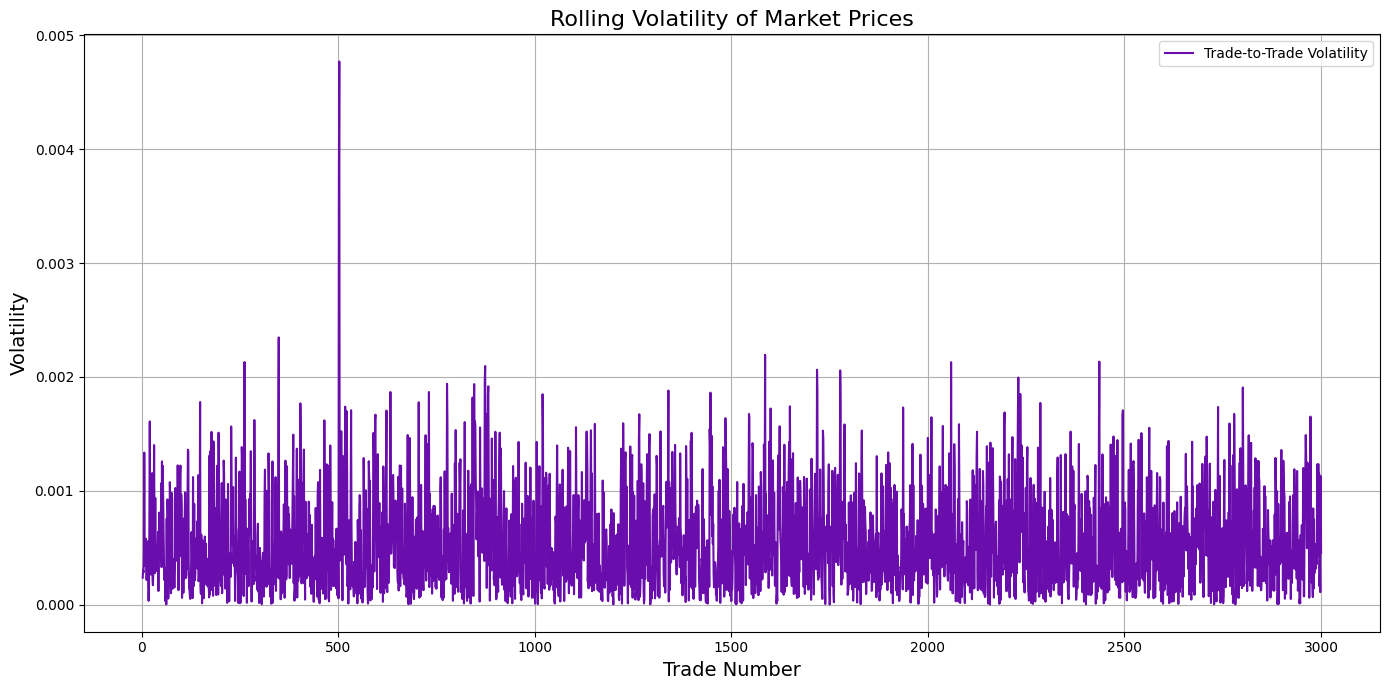

In [141]:
# Plotting the volatility
plt.figure(figsize=(14, 7))
plt.plot(df_1['Trade Number'], df_1['Volatility'], label='Trade-to-Trade Volatility', color='#6A0DAD')

# Adding labels and title
plt.title('Rolling Volatility of Market Prices', fontsize=16)
plt.xlabel('Trade Number', fontsize=14)
plt.ylabel('Volatility', fontsize=14)
plt.legend()
plt.grid()

# Show plot
plt.tight_layout()
plt.show()


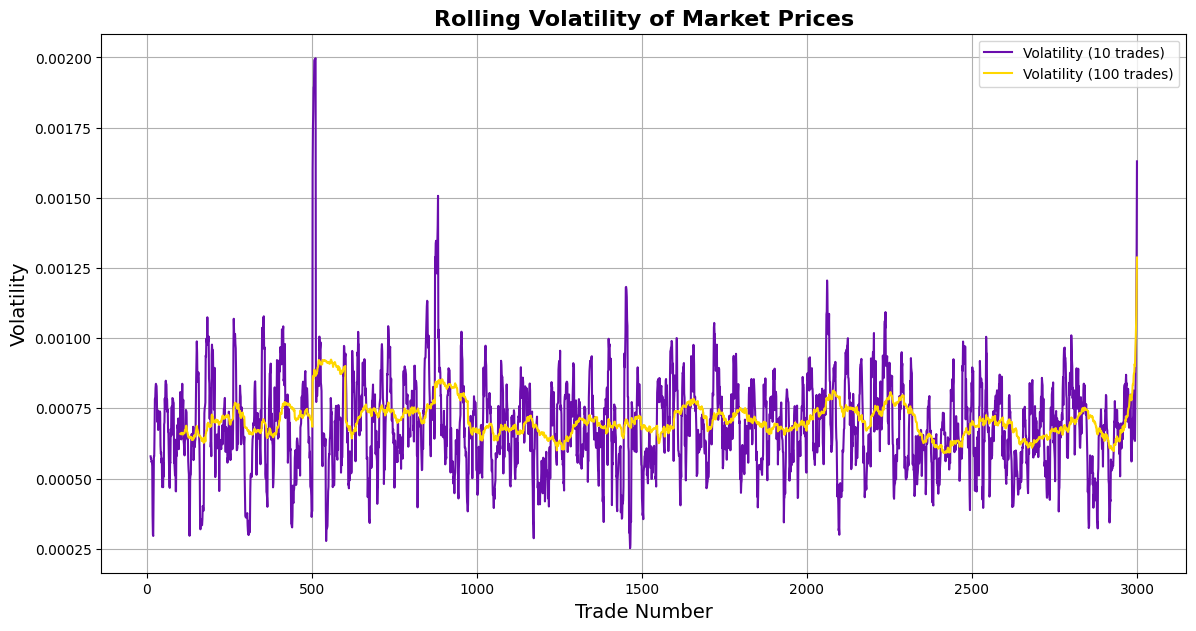

In [142]:
plt.figure(figsize=(14, 7))
plt.plot(df_1['Trade Number'], df_1['Volatility_10'], label='Volatility (10 trades)', color='#6A0DAD')  # Purple
plt.plot(df_1['Trade Number'], df_1['Volatility_100'], label='Volatility (100 trades)', color='#FFD700')  # Yellow

# Adding labels and title
plt.title('Rolling Volatility of Market Prices', fontsize=16, weight='bold')
plt.xlabel('Trade Number', fontsize=14)
plt.ylabel('Volatility', fontsize=14)
plt.legend()
plt.grid()

# Show plot
plt.show()


# Volatility Group By Speculator Proportion

In [143]:
df_2 = df.copy() 

df_2['Returns'] = df_2['Market Price'].pct_change()
volatility_grouped = df_2.groupby('Speculator Proportion')['Returns'].std().reset_index()
volatility_grouped.columns = ['Speculator Proportion', 'Volatility']
volatility_grouped

,Speculator Proportion,Volatility
0,64.927969,NaN
1,64.928020,0.000689
2,64.928072,NaN
3,64.928123,0.000377
4,64.928174,NaN
...,...,...
771,64.973384,0.000448
772,64.973436,0.000680
773,64.973487,0.000978
774,64.973538,0.000880
